The derivation in the textbook shows that q is a solution to the equation
$$q=e^{⟨k⟩ (q-1)} $$

Given the information above, what is the theoretical estimate for the number of nodes in the LCC, expressed in terms of the known variables, n, q, and ⟨k⟩?

Answer:
$$(1-q) * n$$


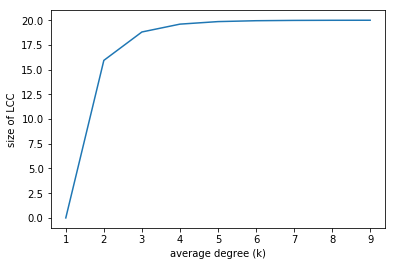

In [2]:
from scipy.optimize import root
import matplotlib.pyplot as plt
import numpy as np

def calculate_q(k):
    return root(lambda q: q - np.exp(k * (q-1)), 0 ).x[0]

n = 20
LCC = [n * (1 - calculate_q(k)) for k in range(1,10)]

plt.plot(range(1,10), LCC)
plt.xlabel('average degree (k)')
plt.ylabel('size of LCC')
plt.show()